<a href="https://colab.research.google.com/github/filipefelisardo/Assignment_5_PML/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
2/2 [==============================] - 1s 429ms/step - loss: 1.1172 - accuracy: 0.3021 - val_loss: 1.0149 - val_accuracy: 0.5833
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 1.0324 - accuracy: 0.3542 - val_loss: 0.9412 - val_accuracy: 0.6250
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.9351 - accuracy: 0.5521 - val_loss: 0.8750 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 0s 36ms/step - loss: 0.8638 - accuracy: 0.6146 - val_loss: 0.8181 - val_accuracy: 0.8333
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.8312 - accuracy: 0.6250 - val_loss: 0.7666 - val_accuracy: 0.8750
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.7310 - accuracy: 0.7396 - val_loss: 0.7214 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.6960 - accuracy: 0.7396 - val_loss: 0.6818 - val_accuracy: 0.8750
Epoch 8/20
2/2 [==========

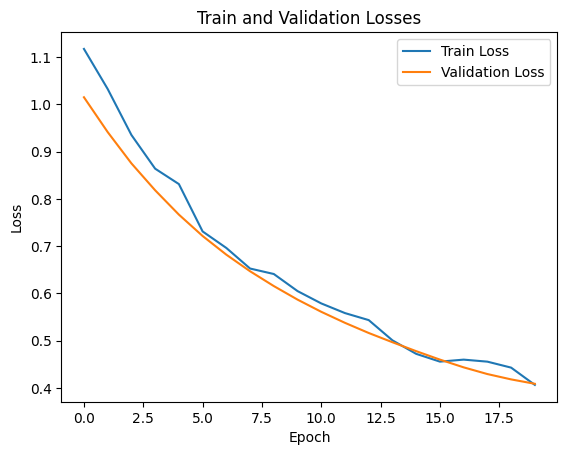

Test loss: 0.3385, Test accuracy: 0.9000
1/1 [==============================] - 0s 75ms/step
Accuracy on test set: 0.9000


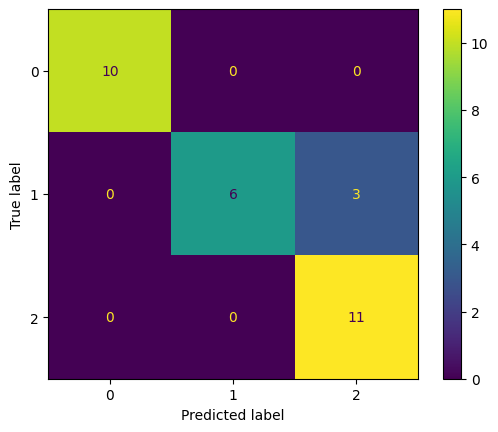

In [3]:

import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

CREATE_CLASS = True  # Create class from scratch; otherwise use Sequential to create the class
SGD = False  # SGD or Adam
IRIS = True  # iris or mnist
SHOW = False  # returns picture of digit for mnist

# Load Iris dataset
if IRIS:
    examples = load_iris()
else:
    examples = load_digits()  # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
    if SHOW:
        idx = np.random.randint(0, len(examples.target))
        print(examples.data[idx])
        print(examples.data[idx].reshape(8, 8))
        print(examples.target[idx])
        plt.matshow(examples.data[idx].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.show()

X = examples.data
y = examples.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 128   #increase hidden units
output_size = len(examples.target_names)
batch_size = 64 #decrease batch size
num_epochs = 20 #increase epochs
# Optimizer specific options
learning_rate = 0.001 #decrease
regularization_param = 0.001
momentum_param = 0.9
# Dropout: if p= 0.5
dropout_p = 0.5  # During training, randomly zeroes some of the elements of the input tensor with probability p.

########################################################### NN model
if CREATE_CLASS:
    # Create model, first defining the class with a forward method
    class ThreeLayerNet(tf.keras.Model):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNet, self).__init__()
            self.fc1 = tf.keras.layers.Dense(hidden_size, activation='relu')
            self.dropout1 = tf.keras.layers.Dropout(dropout_p)
            self.fc2 = tf.keras.layers.Dense(hidden_size, activation='relu')
            self.dropout2 = tf.keras.layers.Dropout(dropout_p)
            self.fc3 = tf.keras.layers.Dense(output_size, activation='softmax')

        def call(self, x):
            x = self.fc1(x)
            x = self.dropout1(x)
            x = self.fc2(x)
            x = self.dropout2(x)
            return self.fc3(x)

    model = ThreeLayerNet(input_size, hidden_size, output_size)
else:
    # Or, in alternative, use Sequential
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
        tf.keras.layers.Dropout(dropout_p),
        tf.keras.layers.Dense(hidden_size, activation='relu'),
        tf.keras.layers.Dropout(dropout_p),
        tf.keras.layers.Dense(output_size, activation='softmax')
    ])

####################################################################################################
# Define loss function and optimizer
# Either tf.keras.losses.SparseCategoricalCrossentropy or tf.keras.losses.CategoricalCrossentropy can be used
criterion = tf.keras.losses.SparseCategoricalCrossentropy()
# Optimizer
if SGD:
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum_param)
else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer,
              loss=criterion,
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.2)

# Plotting train and validation losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Losses')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

# Testing the model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
